In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [7]:
def prepare_data(no_VIP, VIP):
    no_VIP['diff'] = no_VIP['complete_time'] - no_VIP['in_time']
    VIP['diff'] = VIP['complete_time'] - VIP['in_time']
    
    no_VIP = no_VIP.sort_values(by=['task_id'])
    no_VIP = no_VIP.reset_index(drop=True)
    VIP = VIP.sort_values(by=['task_id'])
    VIP = VIP.reset_index(drop=True)
    
    only_VIP_VIP = VIP[VIP['is_VIP'] == True]
    only_VIP_no_VIP = no_VIP[VIP['is_VIP'] == True]
    
    non_VIP_VIP = VIP[VIP['is_VIP'] == False]
    non_VIP_no_VIP = no_VIP[VIP['is_VIP'] == False]
    diff = only_VIP_no_VIP['diff'] - only_VIP_VIP['diff']
    
    print('VIP - NO VIP:')
    print(only_VIP_no_VIP['diff'].mean())
    print('VIP - VIP:')
    print(only_VIP_VIP['diff'].mean())
    
    print('NONVIP - NO VIP:')
    print(non_VIP_no_VIP['diff'].mean())
    print('NONVIP - VIP:')
    print(non_VIP_VIP['diff'].mean())
    print('\n----\n')
    #display(non_VIP_VIP)
    #print('DIFF:')
    #display(diff.describe())

In [8]:
df_TP_no_VIP = pd.read_csv('../tests/07/in_Central2_out_TP.csv', delimiter=';')
df_TP_VIP = pd.read_csv('../tests/07/in_Central2_out_VIP_TP.csv', delimiter=';')

df_TPTS_no_VIP = pd.read_csv('../tests/07/in_Central2_out_TPTS.csv', delimiter=';')
df_TPTS_VIP = pd.read_csv('../tests/07/in_Central2_out_VIP_TPTS.csv', delimiter=';')

df_LCPD_no_VIP = pd.read_csv('../tests/07/in_Central2_out_Central.csv', delimiter=';')
df_LCPD_VIP = pd.read_csv('../tests/07/in_Central2_out_VIP_Central.csv', delimiter=';')

prepare_data(df_TP_no_VIP, df_TP_VIP)
prepare_data(df_TPTS_no_VIP, df_TPTS_VIP)
prepare_data(df_LCPD_no_VIP, df_LCPD_VIP)


VIP - NO VIP:
59.72527472527472
VIP - VIP:
15.516483516483516
NONVIP - NO VIP:
63.056372549019606
NONVIP - VIP:
78.07107843137256

----

VIP - NO VIP:
37.10989010989011
VIP - VIP:
16.494505494505493
NONVIP - NO VIP:
40.080882352941174
NONVIP - VIP:
48.59681372549019

----

VIP - NO VIP:
22.802197802197803
VIP - VIP:
17.604395604395606
NONVIP - NO VIP:
25.691176470588236
NONVIP - VIP:
25.761029411764707

----



## VIP

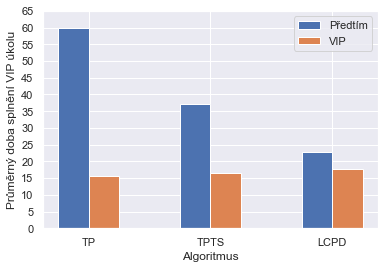

In [21]:
labels = ['TP', 'TPTS', 'LCPD']
NO_VIP = [59.72, 37.10, 22.80]
VIP = [ 15.51, 16.49, 17.60]


x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, NO_VIP, width, label='Předtím')
rects3 = ax.bar(x + width/2, VIP, width, label='VIP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Průměrný doba splnění VIP úkolu')
ax.set_xlabel('Algoritmus')
ax.set_xticks(x)
ax.yaxis.set_ticks(np.arange(0, 70, 5))
ax.set_xticklabels(labels)
ax.legend()
ax.get_figure().savefig(f't05_VIP.png', dpi=300)

## NON VIP

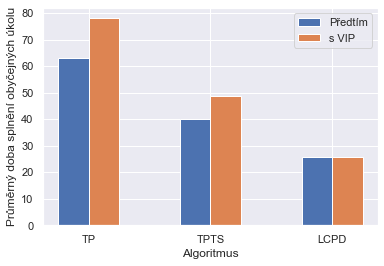

In [18]:
labels = ['TP', 'TPTS', 'LCPD']
NO_VIP = [63.056372549019606, 40.080882352941174, 25.691176470588236]
VIP = [78.07107843137256, 48.59681372549019, 25.761029411764707]


x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, NO_VIP, width, label='Předtím')
rects3 = ax.bar(x + width/2, VIP, width, label='s VIP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Průměrný doba splnění obyčejných úkolu')
ax.set_xlabel('Algoritmus')
ax.set_xticks(x)
ax.yaxis.set_ticks(np.arange(0, 85, 10))
ax.set_xticklabels(labels)
ax.legend()
ax.get_figure().savefig(f't05_non_VIP.png', dpi=300)

In [23]:
2576.1029411764707 / 25.691176470588236

100.27189467658845

## Náročnost

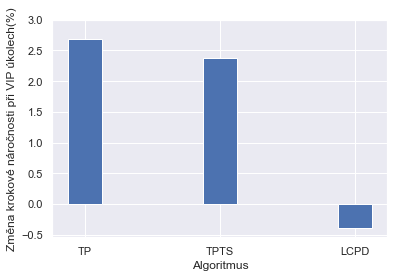

In [22]:
labels = ['TP', 'TPTS', 'LCPD']
NO_VIP = [19333, 18166, 17920]
VIP = [1985100/19333 -100, 1859700/18166-100, 1785000/17920-100]


x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()

rects3 = ax.bar(x , VIP, width, label='VIP')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Změna krokové náročnosti při VIP úkolech(%)')
ax.set_xlabel('Algoritmus')
ax.set_xticks(x)
ax.yaxis.set_ticks(np.arange(-0.5, 3.5, 0.5))
ax.set_xticklabels(labels)
#ax.legend()
ax.get_figure().savefig(f't05_narocenost.png', dpi=300)